## Observations and Insights 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, how='left', on = 'Mouse ID')
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice in the DataFrame.
num_of_mice = study_data["Mouse ID"].unique()
print(len(num_of_mice))

249


In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data[study_data[['Mouse ID','Timepoint']].duplicated(keep=False)]


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data[study_data['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [33]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data['Mouse ID'].unique())

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_study_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_study_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_study_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_dev = clean_study_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_error = clean_study_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame({'Mean': means,'Median': medians,'Variance': variance,'StdDev': std_dev,
                              'SEM': std_error
                             })
summary_stats
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_study_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']}) 
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

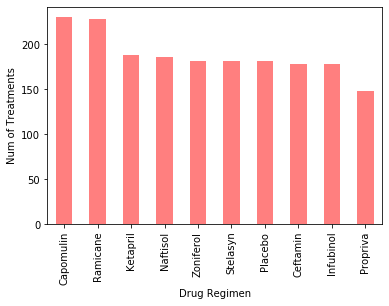

In [36]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
count = clean_study_data['Drug Regimen'].value_counts()
count.plot(kind='bar' ,color='r', alpha=0.5, align="center")
plt.xticks(rotation= 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Treatments")
plt.show()


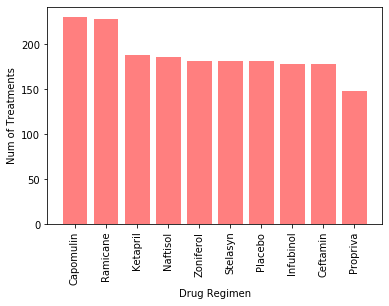

In [40]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(count.index, count, color='r', alpha=0.5, align="center")
plt.xticks(rotation= 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Treatments")
plt.show()



## Pie Plots

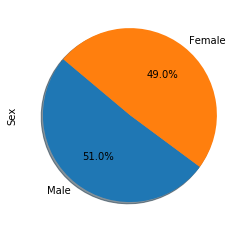

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count = clean_study_data['Sex'].value_counts()
count.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140);


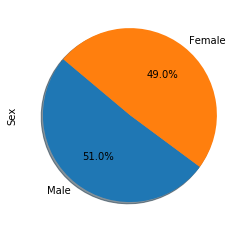

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count,labels= count.index, autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume = []


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
226      j246          0           45.000000                 0    Capomulin   
227      r554          0           45.000000                 0    Capomulin   
228      s185          0           45.000000                 0    Capomulin   
229      b742          0           45.000000                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1854     s710         45           40.728578                 1    Capomulin   
1859     j119         45           38.125164                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female

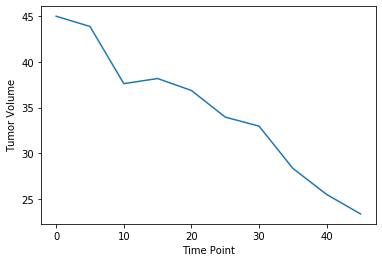

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_study_data.loc[clean_study_data['Drug Regimen']== "Capomulin"]
print(capomulin)
capomulin_mouse = capomulin.loc[capomulin['Mouse ID']== "s185"]
print(capomulin_mouse)
plt.plot(capomulin_mouse['Timepoint'],capomulin_mouse['Tumor Volume (mm3)'])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.show()

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
228      s185          0           45.000000                 0    Capomulin   
447      s185          5           43.878496                 0    Capomulin   
671      s185         10           37.614948                 0    Capomulin   
714      s185         15           38.177232                 0    Capomulin   
968      s185         20           36.866876                 0    Capomulin   
1196     s185         25           33.949940                 0    Capomulin   
1377     s185         30           32.959671                 1    Capomulin   
1479     s185         35           28.328531                 1    Capomulin   
1652     s185         40           25.472143                 1    Capomulin   
1849     s185         45           23.343598                 1    Capomulin   

         Sex  Age_months  Weight (g)  
228   Female           3          17  
447   Female           3          17  
671   Female 

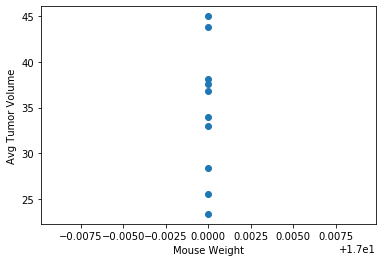

In [64]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_study_data.loc[clean_study_data['Drug Regimen']== "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin['Mouse ID']== "s185"]
print(capomulin_mouse)
x_values = capomulin_mouse['Weight (g)']
print(x_values)
y_values = capomulin_mouse.mean()['Tumor Volume (mm3)']
print(y_values)
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()

## Correlation and Regression

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and avg tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")


The correlation coefficient between mouse weight and avg tumor volume is nan


C:\Users\prasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [68]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()

C:\Users\prasa\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\prasa\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


ValueError: Image size of 187000x346 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>